- save the lenet model (checkpoint, tf.train.saver)
- load the lenet model
- restart training

In [1]:
import tensorflow as tf

In [2]:
fname = 'model-100-0.52.ckpt'
meta_fname = fname+'.meta'
checkpoint_dir = './mnist_lenet/'
for v in tf.trainable_variables():
    print v.name

In [3]:
# load the graph into default graph
new_saver = tf.train.import_meta_graph(checkpoint_dir+meta_fname)
for v in tf.trainable_variables():
    print v.name

conv_layer1/Conv/weights:0
conv_layer1/Conv/biases:0
conv_layer2/Conv/weights:0
conv_layer2/Conv/biases:0
fc_layer1/fully_connected/weights:0
fc_layer1/fully_connected/biases:0
fc_layer2/fully_connected/weights:0
fc_layer2/fully_connected/biases:0


In [6]:
train_op = tf.get_collection('train_op')[0]
print train_op

Tensor("OptimizeLoss/control_dependency:0", shape=(), dtype=float32)


In [19]:
# load the variable value into graph
paras = []
names = []
with tf.Session() as sess:
    new_saver.restore(sess, checkpoint_dir+fname)
    for v in tf.trainable_variables():
        names.append(v.name)
        paras.append(v.eval(sess))

In [20]:
for p,n in zip(paras,names):
    print n,p.shape

conv_layer1/Conv/weights:0 (5, 5, 1, 32)
conv_layer1/Conv/biases:0 (32,)
conv_layer2/Conv/weights:0 (5, 5, 32, 64)
conv_layer2/Conv/biases:0 (64,)
fc_layer1/fully_connected/weights:0 (3136, 1024)
fc_layer1/fully_connected/biases:0 (1024,)
fc_layer2/fully_connected/weights:0 (1024, 10)
fc_layer2/fully_connected/biases:0 (10,)


# visualize the parameter

In [21]:
%pylab inline
conv1_weight = paras[0]
conv1_bias = paras[1]

Populating the interactive namespace from numpy and matplotlib


In [22]:
conv1_weight.shape

(5, 5, 1, 32)

[[-0.00516318  0.04482708 -0.05898449 -0.08218686 -0.05365453]
 [-0.04021062  0.06647059  0.01489461  0.0832224  -0.02161128]
 [ 0.04855992 -0.01322181 -0.01070033 -0.05315398 -0.07970252]
 [ 0.04686295  0.08152736 -0.04813642 -0.0675629  -0.07342914]
 [ 0.07059426  0.00641206  0.01793653 -0.05563544  0.04204448]]


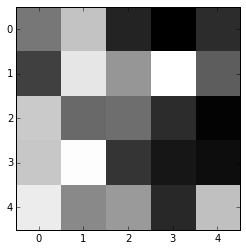

In [26]:
imshow(conv1_weight[:,:,0,0],cmap='gray',interpolation='nearest')
print conv1_weight[:,:,0,0]

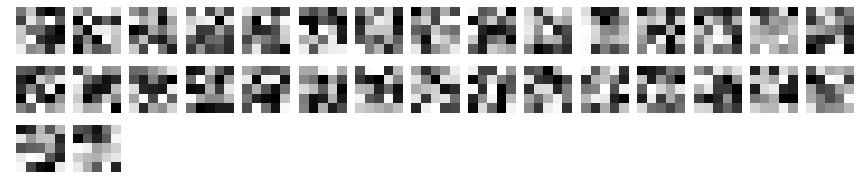

In [34]:
figure(figsize=(15,3))
for i in range(32):
    subplot(3,15,i+1)
    imshow(conv1_weight[:,:,0,i],cmap='gray',interpolation='nearest')    
    axis('off')

# all in one

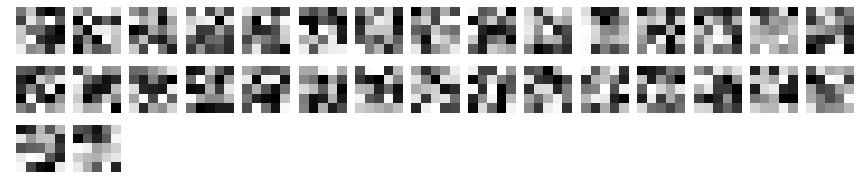

In [36]:
fname = 'model-1900-0.69.ckpt'
meta_fname = fname+'.meta'
checkpoint_dir = './mnist_lenet/'

new_saver = tf.train.import_meta_graph(checkpoint_dir+meta_fname)
paras = []
names = []
with tf.Session() as sess:
    new_saver.restore(sess, checkpoint_dir+fname)
    for v in tf.trainable_variables():
        names.append(v.name)
        paras.append(v.eval(sess))
        
figure(figsize=(15,3))
for i in range(32):
    subplot(3,15,i+1)
    imshow(conv1_weight[:,:,0,i],cmap='gray',interpolation='nearest')    
    axis('off')